<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/ESAA_WEEK13_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **[ 개념정리 ]**

#### **Chapter 7. 군집화**

##### **03 평균 이동(Mean Shift)**

평균 이동(Mean Shift): 군집을 중심으로 지속적으로 움직이면서 군집화 수행(K-평균과 유사)
- 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE(Kernel Density Estimation) 함수 값으로 입력 -> 반환 값을 현재 위치에서 업데이트하며 이동하는 방식
- 위 과정을 반복하며 데이터의 군집 중심점을 찾
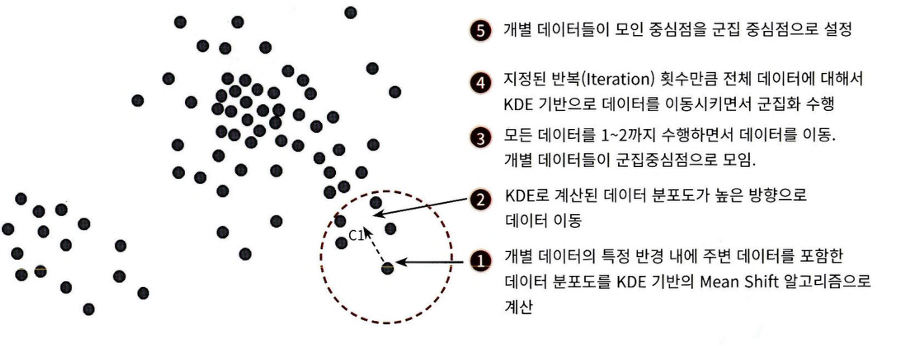

[ K-평균과 차이점 ]
- K-평균: 중심에 소속된 데이터의 평균 거리 중심으로 이동
- 평균 이동: 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동(데이터의 분포도 활용)



- KDF(Kernel Density Function): 커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
  - 관측 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤, 데이터 건수로 나눠 확률 밀도 함수 추정
  - 대표적인 커널 함수: 가우시안 분포 함수
  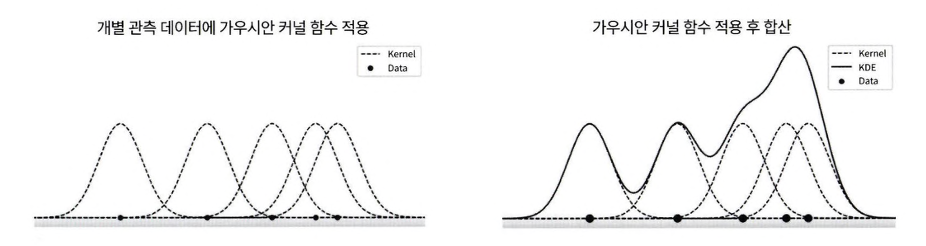



- KDE(Kernel Density Estimation)

  KDE = $\frac{1}{n}$ $\sum_{i=1}^{n}$ $(x-x_i)$ = $\frac{1}{nh}$ $\sum_{i=1}^{n}$ $K \frac{(x-x_i)}{h}$

  - K: 커널 함수, x: 확률 변수값, xi: 관측값, h: 대역폭(bandwidth)

  - 대역폭 h: KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용 -> 확률 밀도 추정 성능을 크게 좌우
  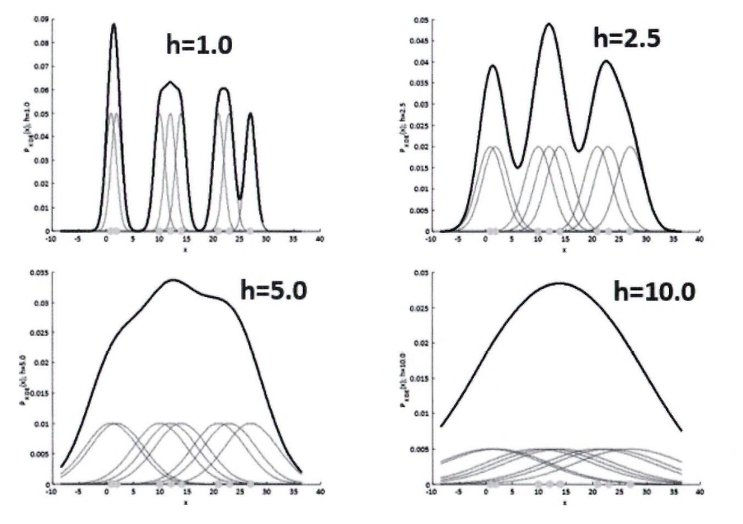



  - h=1.0 -> 변동성이 큰 방식으로 과적합하기 쉬움
  - h=10.0 -> 과도하게 평활화된 KDE로 지나치게 단순한 방식으로 과소적합하기 쉬움

평균 이동 군집화
- 대역폭이 클수록 평활된 KDE로 인해 적은 수의 군집 중심점을 가짐
- 대역폭이 적을수록 많은 수으 군집 중심점을 가짐

- 군집의 개수를 지정하지 X
- Only 대역폭의 크기에 따라 군집화 수행

사이킷런 MeanShift 클래스
```
from sklearn.cluster import MeanShift

sklearn.cluster.MeanShift(bandwidth = h)

sklearn.cluster.MeanShift(bandwidth = h).fit_predict(X)

# 군집 중심 좌표
sklearn.cluster.MeanShift(bandwidth = h).cluster_centers_
```

사이킷런 estimate_bandwidth
```
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
```

##### **04 GMM(Gaussian Mixture Model)**

GMM(Gaussion Mixture Model): 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(Gaussian Distribution)를 가진 데이터 집합들이 섞여 생성된 것이라는 가정하에  군집화 수행
- 섞인 데이터 분포에서 개별 유행의 가우시안 분포를 추출
  - 데이터 세트를 구성하는 여러 개의 정규 분포 곡선을 추출 -> 개별 데이터가 이 중 어떤 정규 분포에 속하는 지 결정하는 방식
  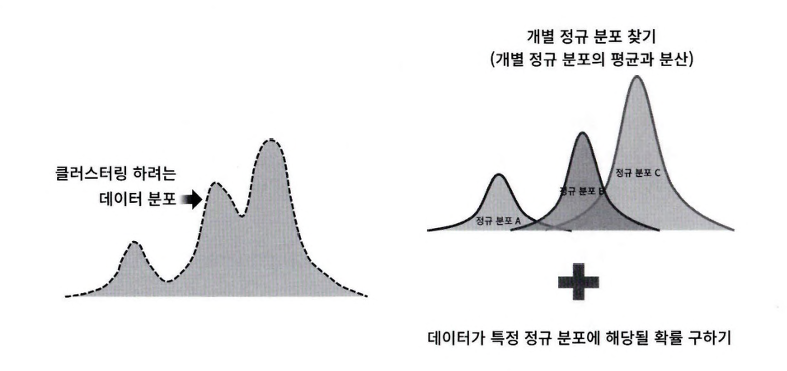





- 모수 추정
  1. 개별 정규 분포의 평균과 분산
  2. 각 데이터가 어떤 정규 분포에 해당되는 지의 확률
  -> EM(Expectation and Maximization) 적용

사이킷런 GMM 클래스
```
from sklearn.mixture import GaussianMixture

sklearn.mixture.GaussianMixture(n_components = n)

GaussianMixture().fit(X)
GaussianMixture().predict(X)
```

- n_components: gaussian mixture의 모델의 총 개수

[ K-평균과 GMM 비교 ]
- K-평균
  -  K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식으로, 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화 수행 가능
- GMM
  - M-평균보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있지만, 군집화를 위한 수행 시간이 오래 걸린다는 단점 존재

### **[ 필사 ]**

##### **03 평균 이동(Mean Shift)**

bandwidth=0.8

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y= make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)

군집을 작게 할수록 군집의 개수가 많아짐

bandwidth=1

In [3]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


최적의 bandwidth를 찾기 위해 estimate_bandwidth() 함수 사용

In [4]:
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.816


군집 중심 좌표 MeanShift().cluster_centers_

In [5]:
import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth=estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


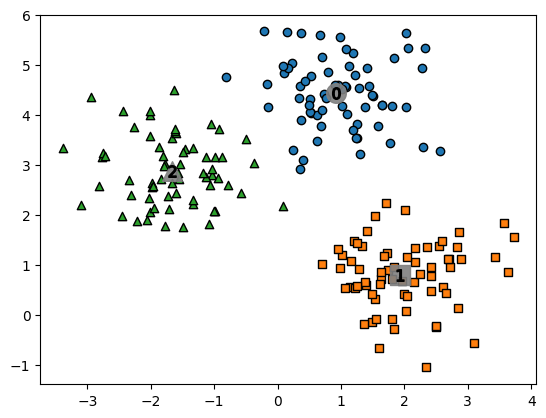

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['meanshift_label']==label]
  center_x_y=centers[label]

  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])

  # 군집별 중심 표현
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,
              marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',marker='$%d$'%label)

plt.show()

In [10]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


##### **04 GMM(Gaussian Mixture Model)**

In [15]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
irisDF['target']=iris.target

In [16]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인.
iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


K-평균 군집화와 비교

In [19]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


붓꽃 데이터 세트에 대해서는 GMM 군집화가 더 효과적임
- K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식으로, 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화 수행 가능

GMM과 K-평균의 비교

In [31]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

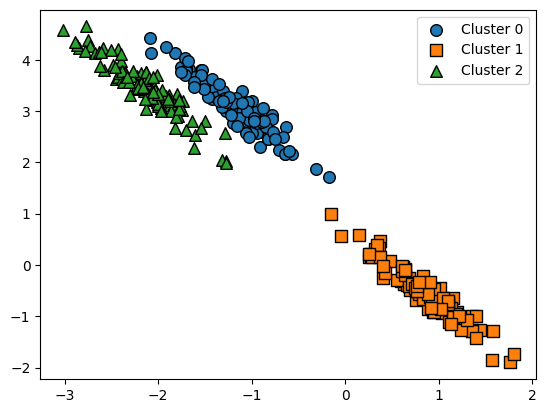

In [32]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦.
X, y=make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation=[[0.60834549, -0.63667341],[-0.40887718,0.85253229]]
X_aniso=np.dot(X,transformation)

# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF=pd.DataFrame(data=X_aniso,columns=['ftr1','ftr2'])
clusterDF['target']=y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

K-평균 군집화 수행

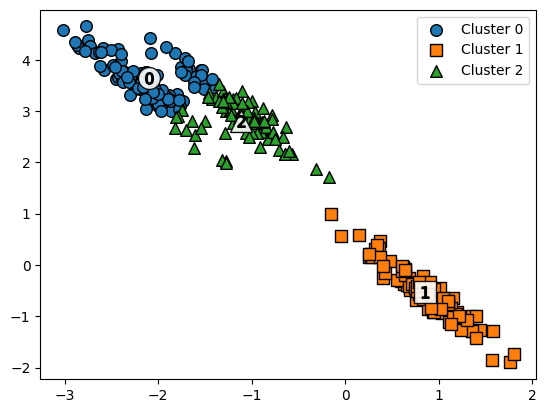

In [33]:
# 3개의 군집 기반 Kmeans를 X_ansio 데이터 세트에 적용
kmeans=KMeans(3, random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)

GMM 군집화

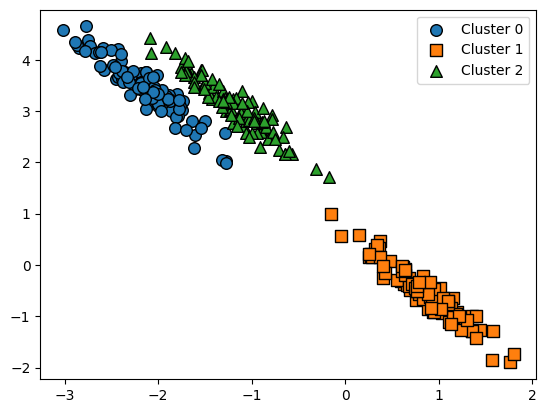

In [34]:
# 3개의 n_components 기반 GMM을 X_ansio 데이터 세트에 적용
gmm=GaussianMixture(n_components=3, random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm,clusterDF,'gmm_label',iscenter=False)

K-평균과 GMM 군집화 결과 비교

In [35]:
print('#### KMeans Clustering ####')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n#### Gaussian Mixture Clustering ####')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

#### KMeans Clustering ####
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

#### Gaussian Mixture Clustering ####
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64
